# Tópicos complementares - Algoritmos supervisionados

`pipenv install pandas seaborn ppscore setuptools nbformat matplotlib scikit-learn ipywidgets ipykernel shap plotly -d --skip-lock --python 3.11`

## PPS

### O que é?

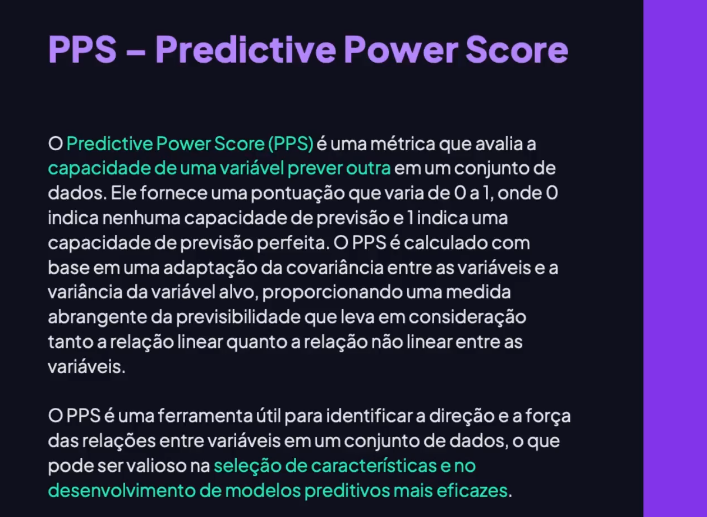

### Importações

In [1]:
import pandas as pd
import seaborn as sns
import ppscore as pps
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression

### Carregar e visualizar os dados - Regressão

In [2]:
df_colesterol = pd.read_csv('./dataset/colesterol.csv')

In [3]:
df_colesterol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  1000 non-null   int64  
 1   Grupo Sanguíneo     1000 non-null   object 
 2   Fumante             1000 non-null   object 
 3   Nível de Atividade  1000 non-null   object 
 4   Idade               1000 non-null   int64  
 5   Peso                1000 non-null   float64
 6   Altura              1000 non-null   int64  
 7   Colesterol          1000 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 62.6+ KB


In [4]:
df_colesterol.head(10)

,Id,Grupo Sanguíneo,Fumante,Nível de Atividade,Idade,Peso,Altura,Colesterol
0,1,B,Sim,Baixo,33,85.1,186,199.63
1,2,A,Não,Moderado,68,105.0,184,236.98
2,3,O,Não,Alto,25,64.8,180,161.79
3,4,A,Não,Alto,43,120.2,167,336.24
4,5,AB,Não,Baixo,79,88.5,175,226.23
5,6,B,Não,Baixo,68,66.8,170,185.31
6,7,A,Sim,Baixo,60,117.3,181,289.33
7,8,O,Sim,Moderado,35,86.9,174,216.48
8,9,O,Não,Baixo,62,81.3,166,235.30
9,10,B,Sim,Alto,44,32.7,165,97.79


### Transformação dos dados

In [5]:
# Transformar variaveis categóricas em numéricas
df_colesterol.drop(columns=['Id'], axis=1, inplace=True)

df_colesterol = pd.get_dummies(df_colesterol, columns=['Grupo Sanguíneo', 'Fumante', 'Nível de Atividade'])

df_colesterol.head(10)

,Idade,Peso,Altura,Colesterol,Grupo Sanguíneo_A,Grupo Sanguíneo_AB,Grupo Sanguíneo_B,Grupo Sanguíneo_O,Fumante_Não,Fumante_Sim,Nível de Atividade_Alto,Nível de Atividade_Baixo,Nível de Atividade_Moderado
0,33,85.1,186,199.63,False,False,True,False,False,True,False,True,False
1,68,105.0,184,236.98,True,False,False,False,True,False,False,False,True
2,25,64.8,180,161.79,False,False,False,True,True,False,True,False,False
3,43,120.2,167,336.24,True,False,False,False,True,False,True,False,False
4,79,88.5,175,226.23,False,True,False,False,True,False,False,True,False
5,68,66.8,170,185.31,False,False,True,False,True,False,False,True,False
6,60,117.3,181,289.33,True,False,False,False,False,True,False,True,False
7,35,86.9,174,216.48,False,False,False,True,False,True,False,False,True
8,62,81.3,166,235.30,False,False,False,True,True,False,False,True,False
9,44,32.7,165,97.79,False,False,True,False,False,True,True,False,False


### Calcular PPS - Regressão

In [ ]:
# Calcular PPS entre as variáveis
pps_matrix_reg = pps.matrix(df_colesterol)
pps_matrix_reg

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,Idade,Idade,1.000000,predict_itself,True,None,0.000000,1.000000,None
1,Idade,Peso,0.000000,regression,True,mean absolute error,16.969100,17.814825,DecisionTreeRegressor()
2,Idade,Altura,0.000000,regression,True,mean absolute error,7.704000,7.902920,DecisionTreeRegressor()
3,Idade,Colesterol,0.000000,regression,True,mean absolute error,40.172500,42.117806,DecisionTreeRegressor()
4,Idade,Grupo Sanguíneo_A,0.028263,classification,True,weighted F1,0.620068,0.630806,DecisionTreeClassifier()
...,...,...,...,...,...,...,...,...,...
164,Nível de Atividade_Moderado,Fumante_Não,0.000000,classification,True,weighted F1,0.512000,0.490741,DecisionTreeClassifier()
165,Nível de Atividade_Moderado,Fumante_Sim,0.000000,classification,True,weighted F1,0.512000,0.490741,DecisionTreeClassifier()
166,Nível de Atividade_Moderado,Nível de Atividade_Alto,0.000003,classification,True,weighted F1,0.612078,0.612079,DecisionTreeClassifier()
167,Nível de Atividade_Moderado,Nível de Atividade_Baixo,0.436717,classification,True,weighted F1,0.498000,0.717232,DecisionTreeClassifier()


In [7]:
# Ajustar matriz para fazer o plot
pps_matrix_reg_pivot = pps_matrix_reg[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
pps_matrix_reg_pivot

x,Altura,Colesterol,Fumante_Não,Fumante_Sim,Grupo Sanguíneo_A,Grupo Sanguíneo_AB,Grupo Sanguíneo_B,Grupo Sanguíneo_O,Idade,Nível de Atividade_Alto,Nível de Atividade_Baixo,Nível de Atividade_Moderado,Peso
y,,,,,,,,,,,,,
Altura,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Colesterol,0.000000,1.000000,0.109942,0.109942,0.032583,0.024909,0.003366,0.065170,0.000000,0.070275,0.052140,0.000000,0.490577
Fumante_Não,0.008409,0.249461,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.065914,0.000000,0.000000,0.000000,0.169296
Fumante_Sim,0.001062,0.247565,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.040425,0.000000,0.000000,0.000000,0.197934
Grupo Sanguíneo_A,0.012391,0.012788,0.000003,0.000003,1.000000,0.000003,0.000003,0.000003,0.028263,0.000003,0.000003,0.000003,0.031822
Grupo Sanguíneo_AB,0.029648,0.000000,0.000003,0.000003,0.000003,1.000000,0.000003,0.000003,0.050918,0.000003,0.000003,0.000003,0.001988
Grupo Sanguíneo_B,0.000005,0.000000,0.000005,0.000005,0.000005,0.000005,1.000000,0.000005,0.000005,0.000005,0.000005,0.000005,0.000000
Grupo Sanguíneo_O,0.030205,0.110233,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.052027,0.000000,0.000000,0.000000,0.000000
Idade,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.002274,0.000000,0.001588,0.000000


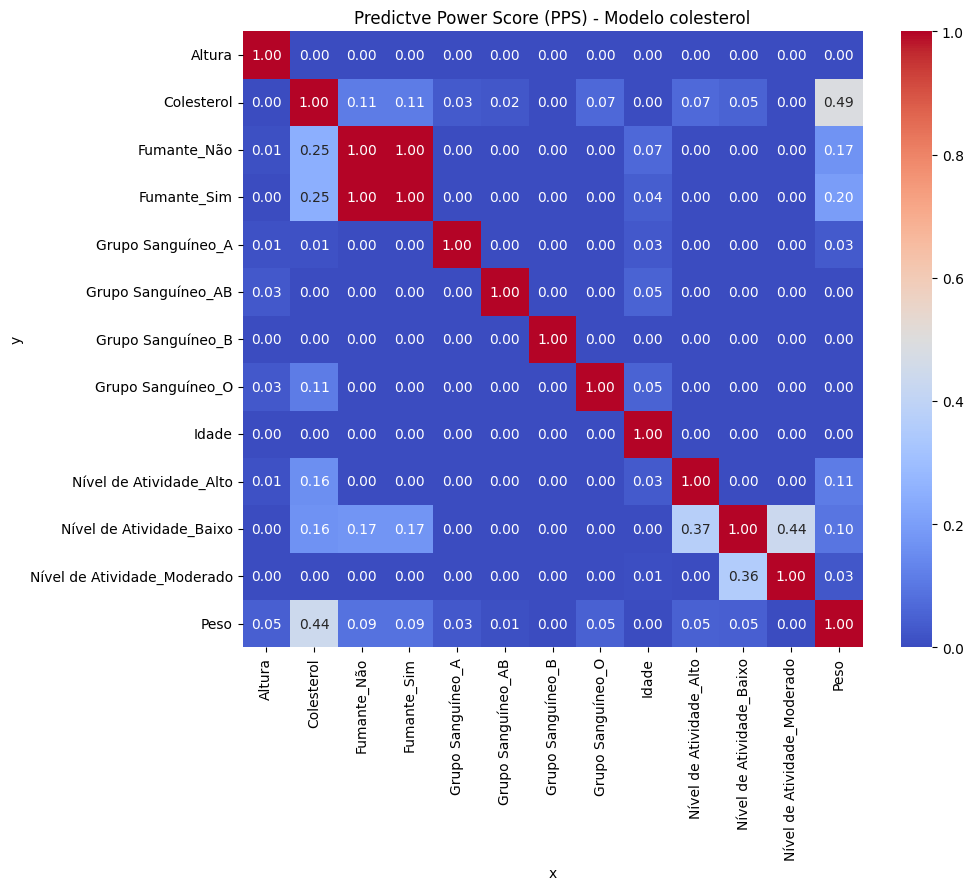

In [8]:
# Plotar a matriz de PPS
plt.figure(figsize=(10, 8))
sns.heatmap(pps_matrix_reg_pivot, cmap="coolwarm", annot=True, fmt=".2f")
plt.title('Predictve Power Score (PPS) - Modelo colesterol')
plt.show()

In [9]:
# Calcular PPS entre 2 variáveis especificas
pps.score(df_colesterol, "Peso", "Colesterol")

{'x': 'Peso',
 'y': 'Colesterol',
 'ppscore': np.float64(0.4905771278030162),
 'case': 'regression',
 'is_valid_score': True,
 'metric': 'mean absolute error',
 'baseline_score': np.float64(40.1725),
 'model_score': np.float64(20.464790333333333),
 'model': DecisionTreeRegressor()}

### Matriz de correlação - Regressão

In [10]:
# Calcular matriz de correlação
corr_matrix_reg = df_colesterol.corr()
corr_matrix_reg

,Idade,Peso,Altura,Colesterol,Grupo Sanguíneo_A,Grupo Sanguíneo_AB,Grupo Sanguíneo_B,Grupo Sanguíneo_O,Fumante_Não,Fumante_Sim,Nível de Atividade_Alto,Nível de Atividade_Baixo,Nível de Atividade_Moderado
Idade,1.000000,-0.006532,0.010507,-0.018119,0.047091,-0.056750,0.019627,-0.005342,-0.013441,0.013441,0.064996,-0.004084,-0.058779
Peso,-0.006532,1.000000,0.380230,0.915698,0.211383,0.133803,-0.062910,-0.280042,-0.381745,0.381745,-0.281584,0.290759,-0.040099
Altura,0.010507,0.380230,1.000000,0.014046,-0.003002,-0.049044,0.027469,0.028905,-0.002448,0.002448,-0.014193,0.035030,-0.024014
Colesterol,-0.018119,0.915698,0.014046,1.000000,0.217447,0.181824,-0.082136,-0.317007,-0.424288,0.424288,-0.305578,0.304779,-0.031906
Grupo Sanguíneo_A,0.047091,0.211383,-0.003002,0.217447,1.000000,-0.366118,-0.244521,-0.416880,-0.070399,0.070399,-0.100925,0.059367,0.034035
Grupo Sanguíneo_AB,-0.056750,0.133803,-0.049044,0.181824,-0.366118,1.000000,-0.245771,-0.419010,-0.099550,0.099550,-0.068017,0.073569,-0.013287
Grupo Sanguíneo_B,0.019627,-0.062910,0.027469,-0.082136,-0.244521,-0.245771,1.000000,-0.279847,0.046184,-0.046184,0.048419,-0.053484,0.010659
Grupo Sanguíneo_O,-0.005342,-0.280042,0.028905,-0.317007,-0.416880,-0.419010,-0.279847,1.000000,0.126631,-0.126631,0.123945,-0.086124,-0.027533
Fumante_Não,-0.013441,-0.381745,-0.002448,-0.424288,-0.070399,-0.099550,0.046184,0.126631,1.000000,-1.000000,0.126632,-0.148026,0.036672
Fumante_Sim,0.013441,0.381745,0.002448,0.424288,0.070399,0.099550,-0.046184,-0.126631,-1.000000,1.000000,-0.126632,0.148026,-0.036672


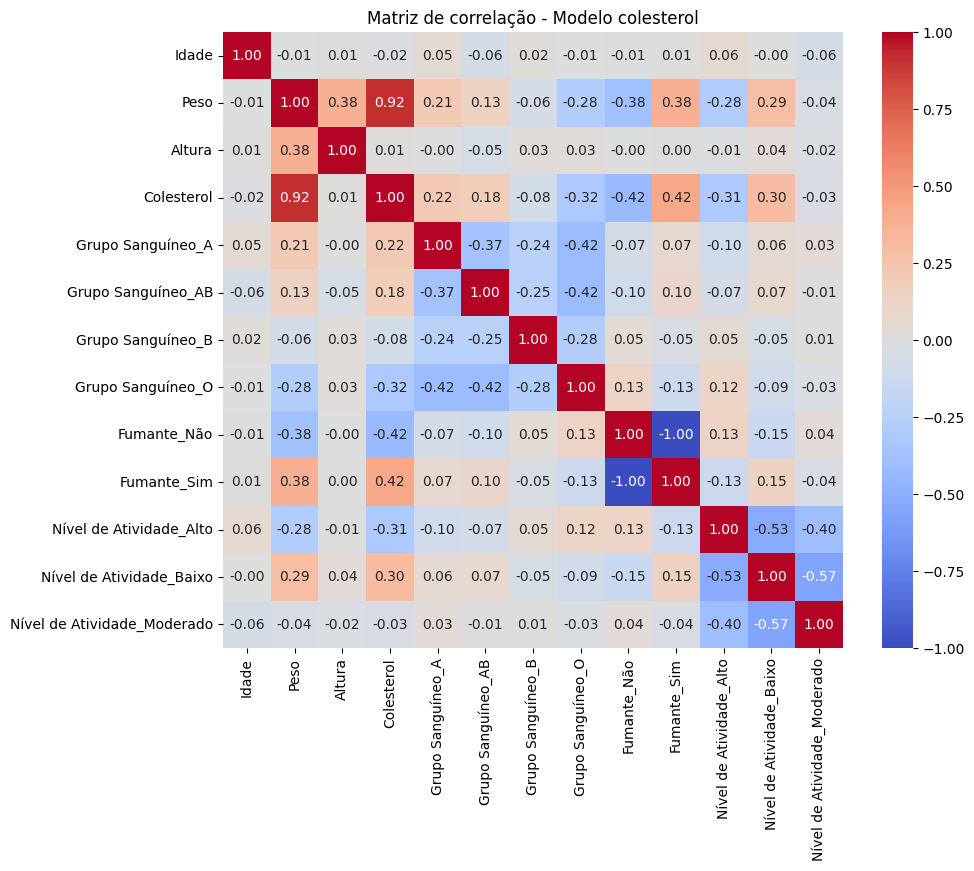

In [11]:
# Plotar a matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_reg, cmap="coolwarm", annot=True, fmt=".2f")
plt.title('Matriz de correlação - Modelo colesterol')
plt.show()

### Treinar modelo linear - Regressão

In [12]:
# Separa X e y
X = df_colesterol.drop(columns=['Colesterol'], axis=1)
y = df_colesterol['Colesterol']

In [13]:
# Treinar modelo de regressão linear múltipla
model_reg = LinearRegression()
model_reg.fit(X, y)

LinearRegression()

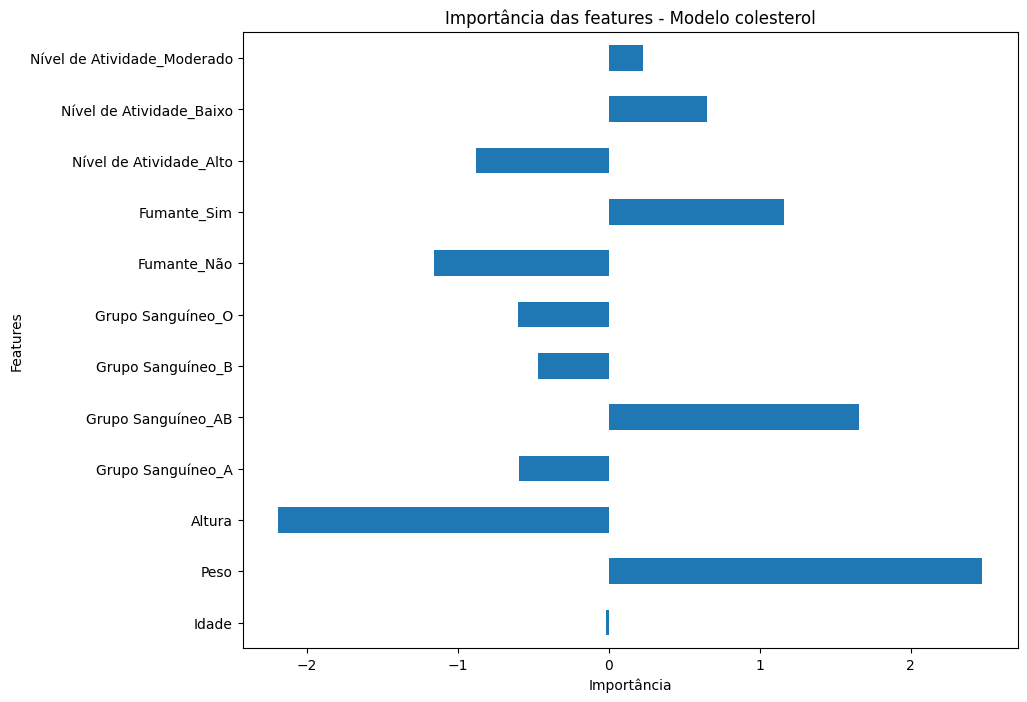

In [14]:
# Avaliar a importâncias das features com base nos coeficientes do modelo
feature_importances_reg = pd.Series(model_reg.coef_, index=X.columns)
feature_importances_reg.plot(kind='barh', figsize=(10, 8))
plt.xlabel('Importância')
plt.ylabel('Features')
plt.title('Importância das features - Modelo colesterol')
plt.show()

### Carregar e preparar dados - Classificação

In [15]:
df_fruit_quality = pd.read_csv('./dataset/fruit_quality.csv')

In [ ]:
df_fruit_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   int64  
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 281.4+ KB


In [17]:
# Ajustar o dataframe
df_fruit_quality.drop(columns=['A_id'], axis=1, inplace=True)

df_fruit_quality.Quality = (df_fruit_quality.Quality == 'good').astype(int)

df_fruit_quality

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,1
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,1
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,0
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,1
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,1
...,...,...,...,...,...,...,...,...
3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784,0
3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235,1
3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611,0
3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229720,1


### Calcular PPS - Classificação

In [18]:
# Calcular PPS entre as variáveis
pps_matrix_class = pps.matrix(df_fruit_quality)
pps_matrix_class

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,Size,Size,1.000000,predict_itself,True,None,0.000000,1.000000,None
1,Size,Weight,0.000000,regression,True,mean absolute error,1.255674,1.814665,DecisionTreeRegressor()
2,Size,Sweetness,0.000000,regression,True,mean absolute error,1.536197,2.078989,DecisionTreeRegressor()
3,Size,Crunchiness,0.000000,regression,True,mean absolute error,1.095270,1.538555,DecisionTreeRegressor()
4,Size,Juiciness,0.000000,regression,True,mean absolute error,1.542205,2.160981,DecisionTreeRegressor()
...,...,...,...,...,...,...,...,...,...
59,Quality,Crunchiness,0.000000,regression,True,mean absolute error,1.095270,1.096059,DecisionTreeRegressor()
60,Quality,Juiciness,0.037673,regression,True,mean absolute error,1.542205,1.484105,DecisionTreeRegressor()
61,Quality,Ripeness,0.027576,regression,True,mean absolute error,1.491283,1.450159,DecisionTreeRegressor()
62,Quality,Acidity,0.000000,regression,True,mean absolute error,1.689354,1.690692,DecisionTreeRegressor()


In [19]:
# Ajustar matriz para fazer o plot
pps_matrix_class_pivot = pps_matrix_class[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
pps_matrix_class_pivot

x,Acidity,Crunchiness,Juiciness,Quality,Ripeness,Size,Sweetness,Weight
y,,,,,,,,
Acidity,1.0,0.000000,0.0000,0.000000,0.00000,0.000000,0.000000,0.000000
Crunchiness,0.0,1.000000,0.0000,0.000000,0.00000,0.000000,0.000000,0.000000
Juiciness,0.0,0.000000,1.0000,0.037673,0.00000,0.000000,0.000000,0.000000
Quality,0.0,0.053106,0.1002,1.000000,0.09018,0.035822,0.086172,0.043337
Ripeness,0.0,0.000000,0.0000,0.027576,1.00000,0.000000,0.000000,0.000000
Size,0.0,0.000000,0.0000,0.034400,0.00000,1.000000,0.000000,0.000000
Sweetness,0.0,0.000000,0.0000,0.023585,0.00000,0.000000,1.000000,0.000000
Weight,0.0,0.000000,0.0000,0.000000,0.00000,0.000000,0.000000,1.000000


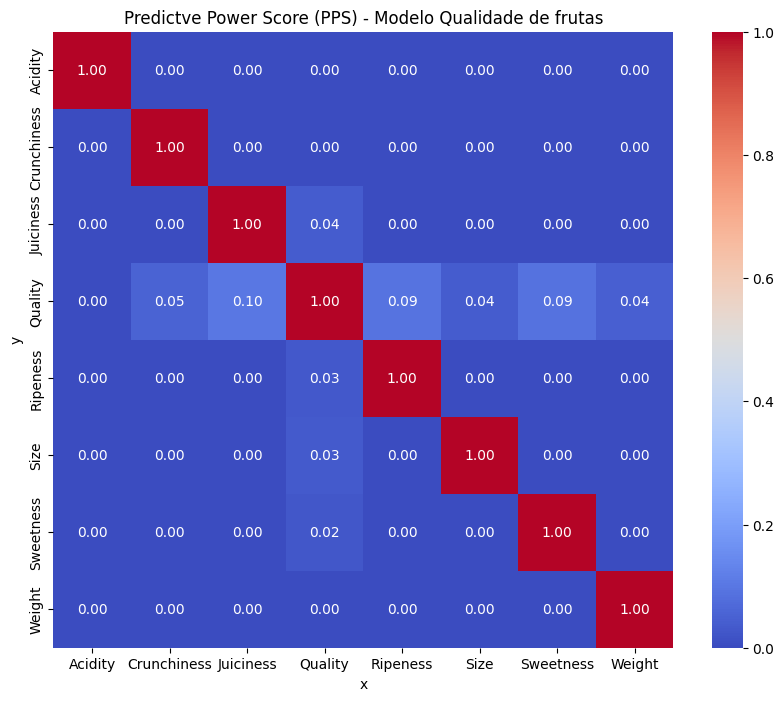

In [20]:
# Plotar a matriz de PPS
plt.figure(figsize=(10, 8))
sns.heatmap(pps_matrix_class_pivot, cmap="coolwarm", annot=True, fmt=".2f")
plt.title('Predictve Power Score (PPS) - Modelo Qualidade de frutas')
plt.show()

In [21]:
# Calcular PPS entre 2 variáveis especificas
pps.score(df_fruit_quality, "Size", "Quality")

{'x': 'Size',
 'y': 'Quality',
 'ppscore': np.float64(0.035821643286573224),
 'case': 'regression',
 'is_valid_score': True,
 'metric': 'mean absolute error',
 'baseline_score': np.float64(0.499),
 'model_score': np.float64(0.48112499999999997),
 'model': DecisionTreeRegressor()}

### Matriz de correlação - Classificação

In [22]:
# Calcular matriz de correlação
corr_matrix_class = df_fruit_quality.corr()
corr_matrix_class

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
Size,1.000000,-0.170702,-0.324680,0.169868,-0.018892,-0.134773,0.196218,0.244007
Weight,-0.170702,1.000000,-0.154246,-0.095882,-0.092263,-0.243824,0.016414,0.001421
Sweetness,-0.324680,-0.154246,1.000000,-0.037552,0.095882,-0.273800,0.085999,0.250998
Crunchiness,0.169868,-0.095882,-0.037552,1.000000,-0.259607,-0.201982,0.069943,-0.012376
Juiciness,-0.018892,-0.092263,0.095882,-0.259607,1.000000,-0.097144,0.248714,0.260223
Ripeness,-0.134773,-0.243824,-0.273800,-0.201982,-0.097144,1.000000,-0.202669,-0.264315
Acidity,0.196218,0.016414,0.085999,0.069943,0.248714,-0.202669,1.000000,-0.007697
Quality,0.244007,0.001421,0.250998,-0.012376,0.260223,-0.264315,-0.007697,1.000000


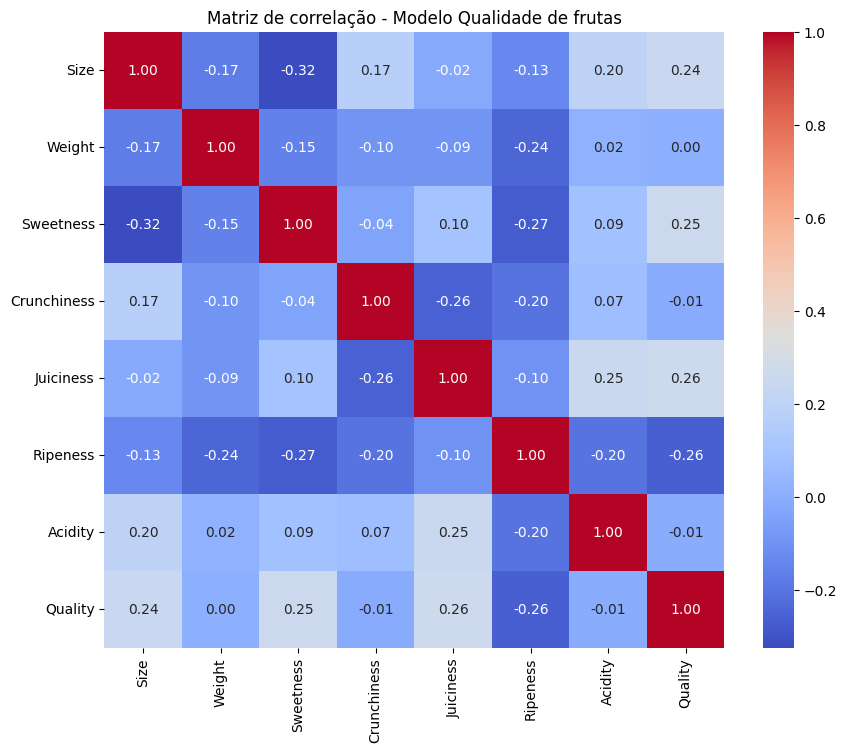

In [23]:
# Plotar a matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_class, cmap="coolwarm", annot=True, fmt=".2f")
plt.title('Matriz de correlação - Modelo Qualidade de frutas')
plt.show()

### Treinar modelo linear - Classificação

In [24]:
# Separa X e y
X = df_fruit_quality.drop(columns=['Quality'], axis=1)
y = df_fruit_quality['Quality']

In [25]:
# Treinar modelo de regressão logística
model_lr = LogisticRegression()
model_lr.fit(X, y)

LogisticRegression()

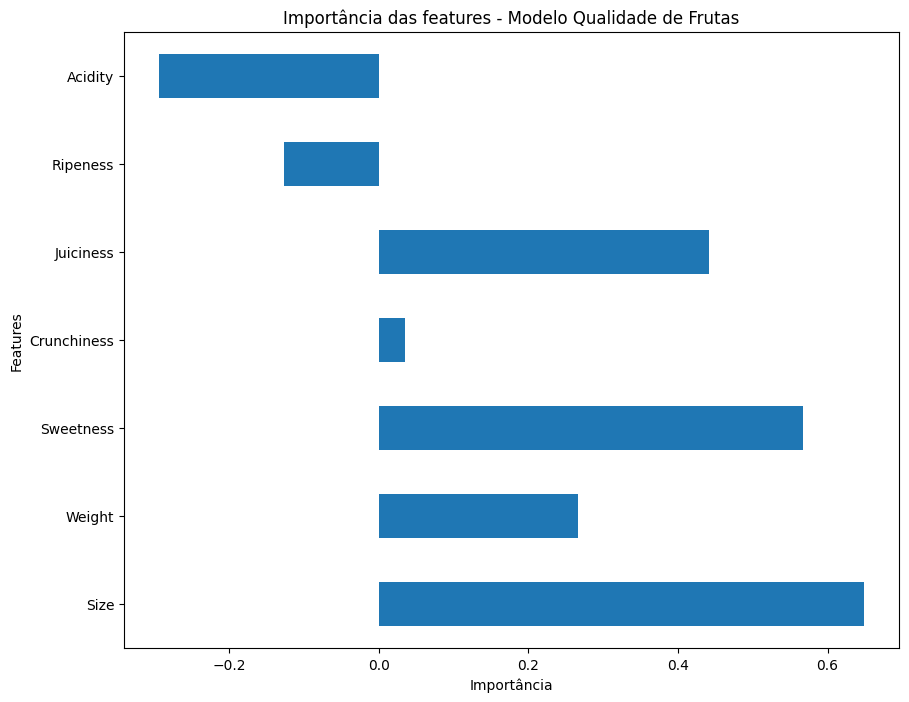

In [26]:
# Avaliar a importâncias das features com base nos coeficientes do modelo
feature_importances_class = pd.Series(model_lr.coef_[0], index=X.columns)
feature_importances_class.plot(kind='barh', figsize=(10, 8))
plt.xlabel('Importância')
plt.ylabel('Features')
plt.title('Importância das features - Modelo Qualidade de Frutas')
plt.show()